In [1]:
import numpy as np
import quicklook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

If the range of the distribution is limited (< 5), then I'll only get a few bins. I need to think about how I increase the precision when necessary.

In [8]:
rng = np.random.RandomState(1)
data = rng.normal(5, 10, size=100)
data2 = rng.normal(-5, 10, size=100)

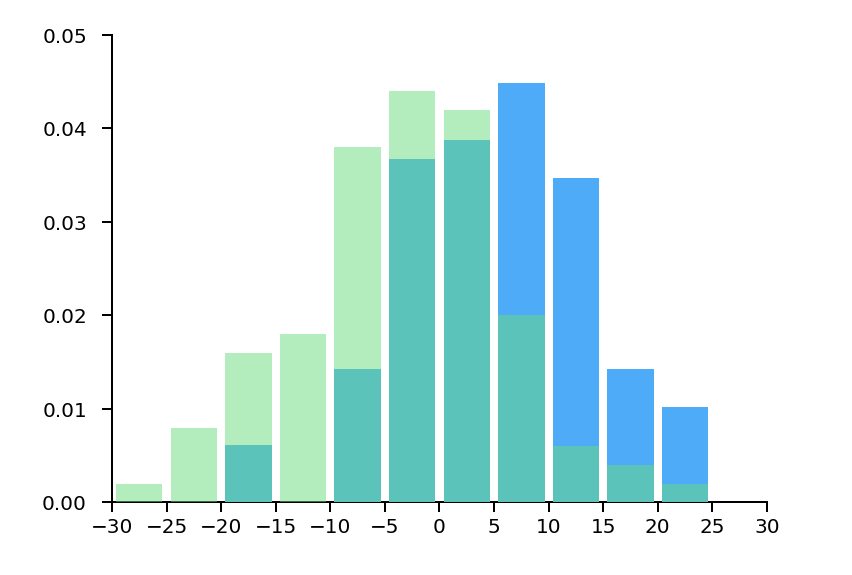

In [11]:
chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = '',
xlabel = '',
ylabel = '',
x_min_max = (-30,30), y_min_max = (0,0.05),
xtick_interval = 5, ytick_interval = 0.01,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);

quicklook.add_plot_distribution(chart_skeleton,
data = data,
auto_fit_to_data = False,
distribution_min = -30,
distribution_max = 30,
bin_interval = 5,
plot_dist_as_pdf = True,
color_name = 'blue', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 1,
label_for_legend = '',
layer_order = 1)

quicklook.add_plot_distribution(chart_skeleton,
data = data2,
auto_fit_to_data = False,
distribution_min = -30,
distribution_max = 30,
bin_interval = 5,
plot_dist_as_pdf = True,
color_name = 'green', #['gray', 'red', 'pink', 'grape', 'violet', 'indigo', 'blue', 'cyan', 'teal', 'green', 'lime', 'yellow', 'orange']
color_brightness = 'default', #['default', 'light', 'dark']
opacity = 0.5,
label_for_legend = '',
layer_order = 1)